All Imports

In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from collections import Counter
from scipy.stats import mode
from sklearn.svm import SVC
import seaborn as sns
import pandas as pd
import numpy as np

In [5]:
data = pd.read_csv('/Users/gauravnaik/Documents/University/Projects/Disease Prediction Using Machine Learning/Training.csv')

In [6]:
data.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN


In [7]:
data.describe()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,Unnamed: 133
count,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,...,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,0.0
mean,0.137805,0.159756,0.021951,0.045122,0.021951,0.162195,0.139024,0.045122,0.045122,0.021951,...,0.021951,0.021951,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171,NaN
std,0.344730,0.366417,0.146539,0.207593,0.146539,0.368667,0.346007,0.207593,0.207593,0.146539,...,0.146539,0.146539,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN


In [8]:
data.dropna(axis=1,inplace=True)

In [10]:
data_input = data.drop(columns=['prognosis'])
data_output = data['prognosis']



data['prognosis'].value_counts()

prognosis
Fungal infection                           120
Hepatitis C                                120
Hepatitis E                                120
Alcoholic hepatitis                        120
Tuberculosis                               120
Common Cold                                120
Pneumonia                                  120
Dimorphic hemmorhoids(piles)               120
Heart attack                               120
Varicose veins                             120
Hypothyroidism                             120
Hyperthyroidism                            120
Hypoglycemia                               120
Osteoarthristis                            120
Arthritis                                  120
(vertigo) Paroymsal  Positional Vertigo    120
Acne                                       120
Urinary tract infection                    120
Psoriasis                                  120
Hepatitis D                                120
Hepatitis B                                120
All

Train, Test & Validation Split

In [11]:
X, X_test, y, y_test = train_test_split(data_input, data_output, test_size=0.30, random_state=0)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.30, random_state=0)

In [13]:
X_train.shape

(2410, 132)

In [14]:
y_train.shape

(2410,)

Encoding prog column

In [15]:
encoder = LabelEncoder()
data["prognosis"] = encoder.fit_transform(data["prognosis"])

In [16]:
data['prognosis']

0       15
1       15
2       15
3       15
4       15
        ..
4915     0
4916     2
4917    38
4918    35
4919    27
Name: prognosis, Length: 4920, dtype: int64

KNN

In [17]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors = 20)
model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_val = model.predict(X_val)

In [21]:
from sklearn.metrics import accuracy_score

accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_val = accuracy_score(y_val, y_pred_val)

print('Training Accuracy:', accuracy_train)
print('Validation Accuracy', accuracy_val)

Training Accuracy: 1.0
Validation Accuracy 1.0


Best model

In [19]:
best_model = KNeighborsClassifier(n_neighbors=10, weights='uniform')
best_model.fit(X_train, y_train)
y_pred_test = best_model.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
print(accuracy_test)

1.0


Decision Tree

In [20]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=3, random_state=2)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=2)

In [22]:
y_pred_train = model.predict(X_train)
y_pred_val = model.predict(X_val)


print('Training Accuracy:', accuracy_score(y_train, y_pred_train))
print('Validation Accuracy:', accuracy_score(y_val, y_pred_val))

Training Accuracy: 0.10995850622406639
Validation Accuracy: 0.07833655705996131


In [23]:
max_depth_values = [1, 2, 3, 4, 5, 6, 7, 8]

training_accuracy_values = []
validation_accuracy_values = []

for max_depth_val in max_depth_values:
    
    model = DecisionTreeClassifier(max_depth=max_depth_val, 
                                   random_state=2)
    
    model.fit(X_train, y_train)
    
    y_pred_train = model.predict(X_train)
    y_pred_val = model.predict(X_val)
    acc_train = accuracy_score(y_train, y_pred_train)
    acc_val = accuracy_score(y_val, y_pred_val)
    
    training_accuracy_values.append(acc_train)
    validation_accuracy_values.append(acc_val)

To check relationship between accuracy and max_depth

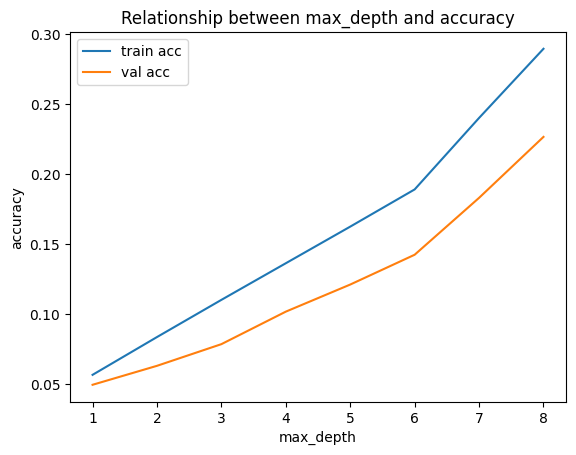

In [24]:
import matplotlib.pyplot as plt

plt.plot(max_depth_values, training_accuracy_values, label="train acc")
plt.plot(max_depth_values, validation_accuracy_values, label="val acc")
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.title('Relationship between max_depth and accuracy')
plt.legend()
plt.show()

As the max_depth increases, the validation accuracy becomes low compared to training accuracy. Best model has a max_depth of 3

In [25]:
model_best = DecisionTreeClassifier(max_depth=45, random_state=2)
model_best.fit(X_train, y_train)



DecisionTreeClassifier(max_depth=45, random_state=2)

Test

In [26]:
y_pred_test = model_best.predict(X_test)

print('Test Accuracy:', accuracy_score(y_test, y_pred_test))


Test Accuracy: 0.9850948509485095
